# Face Recognition Comparison

This experiment aims to compare the performance of a facial recognition model in distinguishing between genuine eyeglasses and artificial sunglasses.

## 1. Setting up

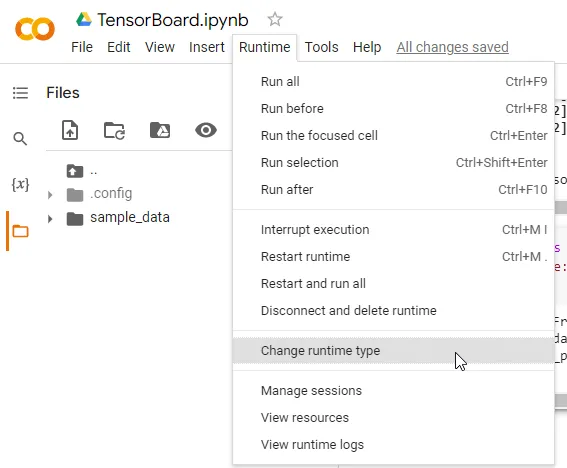

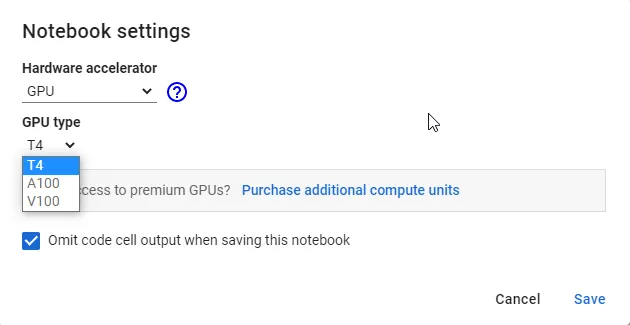

## 2. Run following cells to get the camera ready

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import sys
import torch
from numpy.linalg import norm
import os
from os.path import basename

In [ ]:
!git clone https://github.com/mk-minchul/AdaFace.git

Cloning into 'AdaFace'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 236 (delta 57), reused 47 (delta 47), pack-reused 146
Receiving objects: 100% (236/236), 38.94 MiB | 14.02 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [ ]:
# download the insighface package to use ArcFace
!git clone https://github.com/deepinsight/insightface.git

# download the pre-trained model ms1mv3_arcface_r100
!gdown 1UYcQKOnIsx-JF3dAJs8ekTQ290r2DInu

sys.path.insert(0, 'insightface/recognition/arcface_torch')
from insightface.recognition.arcface_torch.backbones import get_model


Cloning into 'insightface'...
remote: Enumerating objects: 11388, done.
remote: Counting objects: 100% (3806/3806), done.
remote: Compressing objects: 100% (1481/1481), done.
remote: Total 11388 (delta 2436), reused 2929 (delta 2279), pack-reused 7582
Receiving objects: 100% (11388/11388), 44.87 MiB | 16.23 MiB/s, done.
Resolving deltas: 100% (6093/6093), done.
Downloading...
From (original): https://drive.google.com/uc?id=1UYcQKOnIsx-JF3dAJs8ekTQ290r2DInu
From (redirected): https://drive.google.com/uc?id=1UYcQKOnIsx-JF3dAJs8ekTQ290r2DInu&confirm=t&uuid=8e05e441-42a9-496f-a91a-c8b3bb866ab7
To: /content/backbone.pth
100% 261M/261M [00:07<00:00, 36.5MB/s]


In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

In [ ]:
%cd /content/AdaFace
from face_alignment.align import get_aligned_face

def take_photo(filename='frontal_photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename



/content/AdaFace


/content/AdaFace/face_alignment/mtcnn_pytorch/src/align_trans.py:287: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if align_type is 'cv2_affine':
/content/AdaFace/face_alignment/mtcnn_pytorch/src/align_trans.py:290: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif align_type is 'affine':


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

## 3. Collecting data: Capturing images

### 1. Take the first selfie without any sunglasses

In [ ]:
from IPython.display import Image
import warnings
# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
try:
  frontal_filename = take_photo()
  print('Saved to {}'.format(frontal_filename))
  img = get_aligned_face(frontal_filename)

  img.save(frontal_filename)

  display(img)


except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

### 2. Take the second selfie with **real** sunglasses

In [ ]:
try:
  real_filename = take_photo(filename='real_sunglasses.jpg')
  print('Saved to {}'.format(real_filename))

  # Show the image which was just taken.

  img2 = get_aligned_face(real_filename)
  img2.save(real_filename)
  display(img2)
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

### 3. Take third selfie with **fake** sunglasses

* 1. Take a picture using your camera
* 2. Click on this link to edit the photo https://picsart.com/create/editor?category=photos
* 3. Make an account (it's free!)
* 4. Click the **Upload** button to upload photo you just took

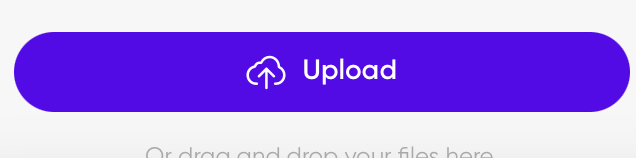



* 5. Once uploaded, click on stickers
* 6. type *sunglasses*
* 7. Select any you like and then click export on the top right

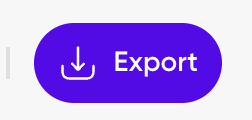

* 8. Name the picture **fake_sunglasses** and click on **download**


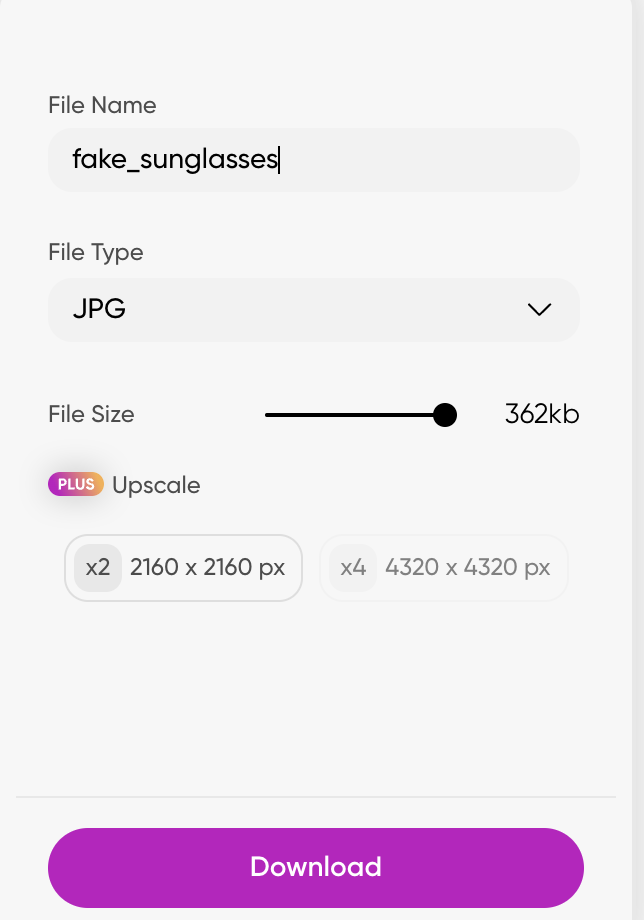


* 9. On Google Colab, click on this icon which is located on the right
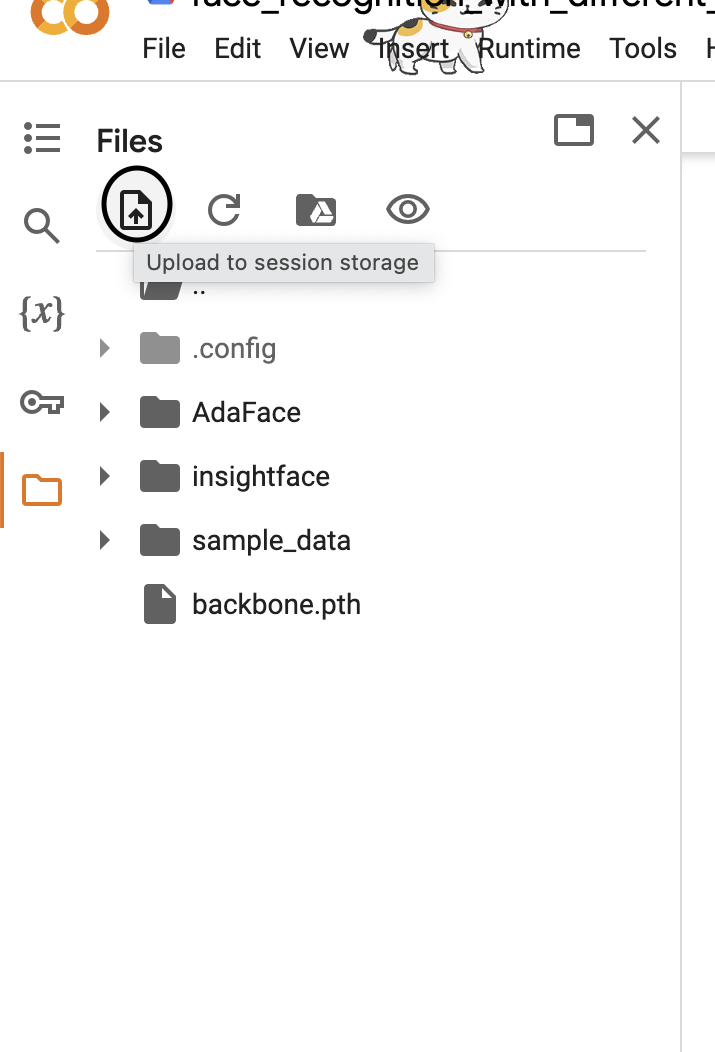


* 10. Find the photo you took and open it to add it to the colab

The right side of the screen should look like this

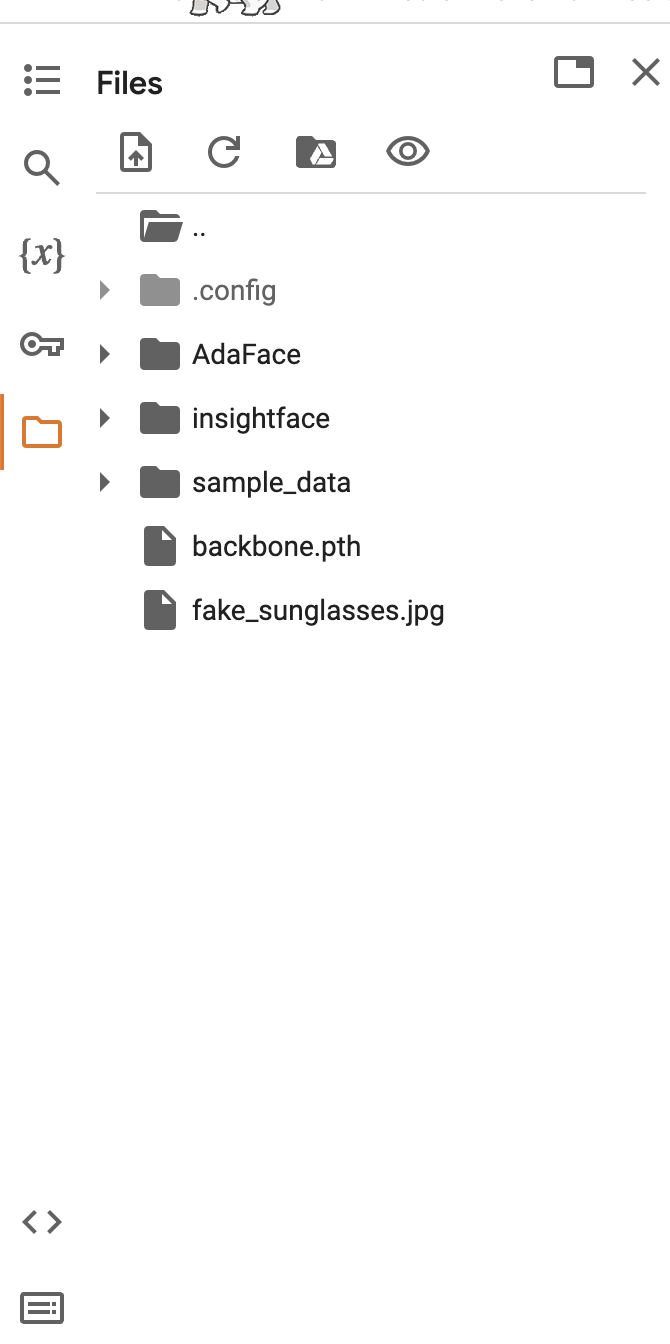

In [ ]:
try:
  fake_filename = '/content/fake_sunglasses.jpg'
  print('Saved to {}'.format(fake_filename))

  # Show the image which was just taken.

  img3 = get_aligned_face(fake_filename)
  img3.save(fake_filename)
  display(img3)
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## 4. Running Experiment

Run the following cells to calculate the similarity scores between the images

In [ ]:
# define function for reading and preprocessing an image
def preprocess(img_path, numpy=False):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (112, 112))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.transpose(img, (2, 0, 1))

    img = torch.from_numpy(img).unsqueeze(0).float()
    img = (img/255 - .5) / .5
    return img

net = get_model('r100', fp16=True)
net.load_state_dict(torch.load('/content/backbone.pth'))
net.cuda()
net.eval()

In [ ]:
from google.colab.patches import cv2_imshow
image_A = preprocess(frontal_filename)
image_B = preprocess(real_filename)
image_C = preprocess(fake_filename)

feat_A = net(image_A.cuda()).detach().cpu().numpy()[0]
feat_A /= norm(feat_A)
feat_B = net(image_B.cuda()).detach().cpu().numpy()[0]
feat_B /= norm(feat_B)
feat_C = net(image_C.cuda()).detach().cpu().numpy()[0]
feat_C /= norm(feat_C)


print(basename(frontal_filename))
cv2_imshow(cv2.imread(frontal_filename))
print(basename(real_filename))
cv2_imshow(cv2.imread(real_filename))
print()
print(f'similarity score between {basename(frontal_filename)} vs {basename(real_filename)} : ', round(np.dot(feat_A, feat_B) ,3))
print()
print(basename(frontal_filename))
cv2_imshow(cv2.imread(frontal_filename))
print(basename(fake_filename))
cv2_imshow(cv2.imread(fake_filename))
print(f'similarity score between {basename(frontal_filename)} vs {basename(fake_filename)} : ', round(np.dot(feat_A, feat_C) ,3))
